In [3]:
import os
import pandas as pd

plotDir = os.path.join(os.path.dirname(os.getcwd()), 'plots')
# print(plotDir)

# Load the data
df = pd.read_csv('BS_table.csv')
# only keep rows with 'SV' in 'Var1'
df = df[df['Var1'].str.contains('SV')]
# print(df.head())

In [5]:
import scipy.io
import os
import numpy as np
from scipy.stats import ttest_1samp
import pandas as pd

# Load the .mat file
mat_data = scipy.io.loadmat('allData.mat')

# Access the 'allData' structure
all_data = mat_data['allData']
group_data = all_data[0, 42]
# print(group_data)


for f in ['F2', 'F3']:
    data = np.full((5, 5), np.nan)  # Adjusted shape to (5, 5)
    for b in ['B3', 'B2', 'B0']:
        for cond in ['bs', 'ctrl']:
            prob_loc_array = np.empty((5, 5, 40))
            field = f'{cond}{f}{b}'
            print(f"\n\nField: {field}")
            for n in range(40):
                # raw = all_data['probLoc'][field]                
                prob_loc = all_data[0, n]['probLoc'][field][0,0]
                prob_loc_array[:, :, n] = prob_loc*4 # it was divided by 20 in matlab, total no of trials in the condition. Here, we want to consider

            # print(prob_loc_array[0,1,:])
            # dim 1: 0-4 flash responses
            # dim 2: 1-5 locations
            # dim 3: 40 subjects
            for resp in range(1,5):
                print(f"\nResponse: {resp}")
                observed_percentages = {
                    'Location 1': prob_loc_array[resp, 0, :],
                    'Location 2': prob_loc_array[resp, 1, :],
                    'Location 3': prob_loc_array[resp, 2, :],
                    'Location 4': prob_loc_array[resp, 3, :],
                    'Location 5': prob_loc_array[resp, 4, :]
                }

                expected_percentages = {
                    'Location 1': resp/5,
                    'Location 2': resp/5,
                    'Location 3': resp/5,
                    'Location 4': resp/5,
                    'Location 5': resp/5
                }

                # Perform one-sample t-test for each location
                results = {}

                for location, observed in observed_percentages.items():
                    expected = expected_percentages[location]
                    t_stat, p_value = ttest_1samp(observed, expected, alternative='greater')
                    
                    # Store the results
                    results[location] = {'T-statistic': t_stat, 'P-value': p_value}

                # Display the results
                results_df = pd.DataFrame(results).T
                # print(results_df)

                # Adjust the p-value threshold for multiple comparisons
                alpha = np.array([0.05, 0.01, 0.001])  # Original significance level
                bonferroni_alpha = alpha / len(observed_percentages)  # Adjusted alpha
                # print(bonferroni_alpha)
                # Check which locations are significant after correction
                significant_locations = results_df[results_df['P-value'] < bonferroni_alpha[0]]

                def assign_stars(p):
                    if p < bonferroni_alpha[2]:
                        return '***'
                    elif p < bonferroni_alpha[1]:
                        return '**'
                    elif p < bonferroni_alpha[0]:
                        return '*'
                    else:
                        return ''
      

                # print(significant_locations)
                if not significant_locations.empty:
                    significant_locations['Bonferroni Stars'] = results_df['P-value'].apply(assign_stars) 
                    print(significant_locations)





Field: bsF2B3

Response: 1

Response: 2


C:\Users\Ailene\AppData\Local\Temp\ipykernel_45336\1009466391.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_locations['Bonferroni Stars'] = results_df['P-value'].apply(assign_stars)
C:\Users\Ailene\AppData\Local\Temp\ipykernel_45336\1009466391.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_locations['Bonferroni Stars'] = results_df['P-value'].apply(assign_stars)
C:\Users\Ailene\AppData\Local\Temp\ipykernel_45336\1009466391.py:84: SettingWithCopyWarning: 
A value is tryin

            T-statistic   P-value Bonferroni Stars
Location 2     4.804761  0.000012              ***
Location 3     4.298657  0.000056              ***
Location 4     4.237914  0.000067              ***

Response: 3
            T-statistic       P-value Bonferroni Stars
Location 2     5.619286  8.747562e-07              ***
Location 3     5.626520  8.547762e-07              ***
Location 4     5.834491  4.396736e-07              ***

Response: 4


Field: ctrlF2B3

Response: 1

Response: 2
            T-statistic   P-value Bonferroni Stars
Location 2     4.429695  0.000037              ***
Location 3     3.021420  0.002213                *
Location 4     5.424308  0.000002              ***

Response: 3
            T-statistic       P-value Bonferroni Stars
Location 2     6.025559  2.386160e-07              ***
Location 3     6.035274  2.313156e-07              ***
Location 4     5.922725  3.315592e-07              ***

Response: 4


Field: bsF2B2

Response: 1

Response: 2
            T-

C:\Users\Ailene\AppData\Local\Temp\ipykernel_45336\1009466391.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_locations['Bonferroni Stars'] = results_df['P-value'].apply(assign_stars)
C:\Users\Ailene\AppData\Local\Temp\ipykernel_45336\1009466391.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_locations['Bonferroni Stars'] = results_df['P-value'].apply(assign_stars)


In [1]:
# Compute d prime and beta
import os
import numpy as np
from scipy.stats import norm
import pandas as pd

csv_dir = 'csv/'
sids = list(set([f.split('_')[0] for f in os.listdir(csv_dir) if f.endswith('.csv')]))

unimodal_dprime = []
unimodal_beta = []

for sid in sids:
    # print(f"\n\nSubject: {sid}")
    L_file = pd.read_csv(f'{csv_dir}{sid}_L.csv')
    R_file = pd.read_csv(f'{csv_dir}{sid}_R.csv')

    combined_LR = pd.concat([L_file, R_file], axis=0)
    # print(combined_LR)

    # first get d' for unimodal detection
    # only get rows where n_beep == 0 and response == 1 (flash response)
    unimodal = combined_LR[combined_LR['response_type'] == 1]
    three_flash = unimodal[unimodal['n_flash'] == 3]
    three_flash['accuracy'] = three_flash['response'] == 3
    # print(three_flash)
    temp = three_flash.groupby(['blindspot', 'n_beep']).mean()
    hitrate = temp['accuracy']
    # print(hitrate)
    
    two_flash = unimodal[unimodal['n_flash'] == 2]
    two_flash['falsealarm'] = two_flash['response'] == 3
    temp = two_flash.groupby(['blindspot', 'n_beep']).mean()
    farate = temp['falsealarm']
    # print(farate)

    # Correct for extreme hitrate and farate values
    hitrate = np.clip(hitrate, 0.01, 0.99)
    farate = np.clip(farate, 0.01, 0.99)

    unimodal_dprime.append((norm.ppf(hitrate) - norm.ppf(farate)))
    unimodal_beta.append(abs(0.5*(norm.ppf(hitrate) + norm.ppf(farate))))

unimodal_dprime = np.array(unimodal_dprime)
unimodal_beta = np.array(unimodal_beta)

columns = pd.MultiIndex.from_product(
    [['Control Spot', 'Blind Spot'], ['0', '2', '3']],
    names=['blindspot', 'n_beep']
)
dprime_df = pd.DataFrame(unimodal_dprime, index=sids, columns=columns)
beta_df = pd.DataFrame(unimodal_beta, index=sids, columns=columns)

print("D': ", dprime_df.head())
print("Beta: ", beta_df.head())




C:\Users\Ailene\AppData\Local\Temp\ipykernel_47980\3955685262.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three_flash['accuracy'] = three_flash['response'] == 3
C:\Users\Ailene\AppData\Local\Temp\ipykernel_47980\3955685262.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_flash['falsealarm'] = two_flash['response'] == 3


D':  blindspot Control Spot                     Blind Spot                    
n_beep               0         2         3          0         2         3
SV022         0.566297  0.245118  0.566297  -0.113916 -0.678412  0.000000
SV031         1.458990  0.366384  0.678412   0.150089 -0.366384 -0.245118
SV009         0.961231  1.186184  0.448027   0.220728 -0.315110  0.355850
SV019         0.000000  0.000000  0.000000   0.000000  0.000000  0.000000
SV032         2.007709  0.366384  1.728588   0.000000  0.000000  0.000000
Beta:  blindspot Control Spot                     Blind Spot                    
n_beep               0         2         3          0         2         3
SV022         0.472267  1.158992  0.472267   1.093391  1.620758  0.385320
SV031         0.205094  2.143156  1.620758   0.599445  2.143156  1.158992
SV009         0.669734  0.846439  0.161307   0.564126  1.802409  0.496565
SV019         2.326348  2.326348  2.326348   2.326348  2.326348  2.326348
SV032         1.322494  2.

                     sum_sq     df          F        PR(>F)
n_beep             3.250656    2.0   8.064823  5.298224e-04
blindspot         14.980371    1.0  74.332108  4.382583e-14
n_beep:blindspot   2.755603    2.0   6.836605  1.569962e-03
Residual          22.974759  114.0        NaN           NaN

Tukey HSD for d_prime:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
  0Blind Spot 0Control Spot   1.1326    0.0  0.7211  1.5441   True
  0Blind Spot   2Blind Spot  -0.0834 0.9917 -0.4949  0.3281  False
  0Blind Spot 2Control Spot   0.4517 0.0227  0.0402  0.8632   True
  0Blind Spot   3Blind Spot   0.0379 0.9998 -0.3737  0.4494  False
  0Blind Spot 3Control Spot   0.4901 0.0099  0.0786  0.9017   True
0Control Spot   2Blind Spot   -1.216    0.0 -1.6275 -0.8045   True
0Control Spot 2Control Spot  -0.6809 0.0001 -1.0924 -0.2694   True
0Contr

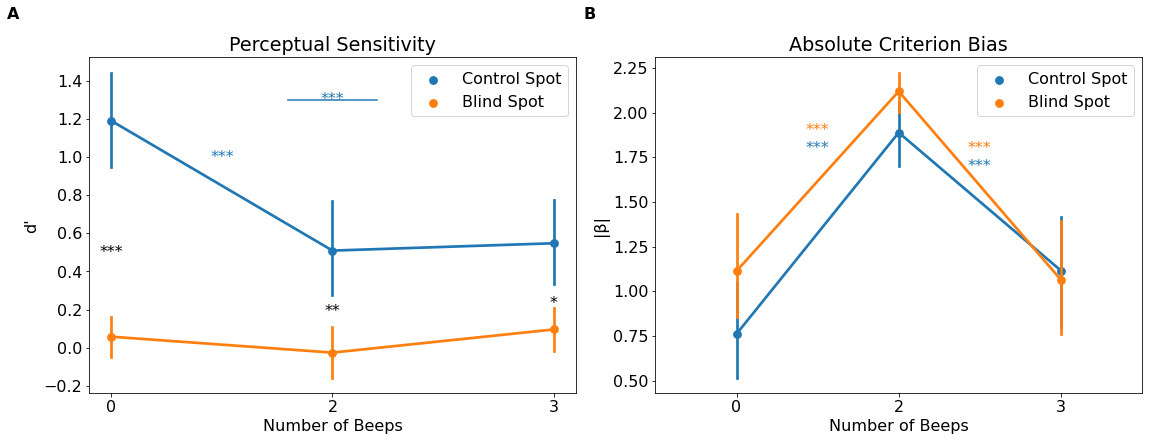

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df_long = dprime_df.reset_index().melt(
    id_vars='index',
    var_name=['blindspot', 'n_beep'],
    value_name='d_prime'
)

df_long.rename(columns={'index': 'sid'}, inplace=True)

plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.pointplot(data=df_long, x="n_beep", y="d_prime", hue="blindspot", ax=ax[0])
palette = sns.color_palette()
colors = palette[:len(df_long["blindspot"].unique())]
ax[0].set_xlabel('Number of Beeps')
ax[0].set_ylabel("d'")
ax[0].set_title("Perceptual Sensitivity")
ax[0].legend()

################
#  Do ANOVA
################
df_long['n_beep'] = df_long['n_beep'].astype('category')
df_long['blindspot'] = df_long['blindspot'].astype('category')
model = ols('d_prime ~ n_beep * blindspot', data=df_long).fit()
anova_table = anova_lm(model, typ=2)
print(anova_table)

#########################
# Tukey HSD for d_prime
#########################
tukey_dprime = pairwise_tukeyhsd(
    endog=df_long['d_prime'],  # Dependent variable
    groups=df_long['n_beep'].astype(str) + df_long['blindspot'].astype(str),  # Combine factors
    alpha=0.05
)
print("\nTukey HSD for d_prime:")
print(tukey_dprime.summary())

# between location, ***, **, *
ax[0].text(0, .5, "***", ha='center', va='center')
ax[0].text(1, .19, "**", ha='center', va='center')
ax[0].text(2, .23, "*", ha='center', va='center')

# Control, 0 vs 2, 0 vs 3, ***
ax[0].text(0.5, 1, "***", ha='center', va='center', color=colors[0])
ax[0].text(1, 1.3, "***", ha='center', va='center', color=colors[0])
ax[0].plot([.8, 1.2], [1.3, 1.3], color=colors[0])
##############################################################
# Criterion
##############################################################

df_long = beta_df.reset_index().melt(
    id_vars='index',
    var_name=['blindspot', 'n_beep'],
    value_name='beta'
)

df_long.rename(columns={'index': 'sid'}, inplace=True)
sns.pointplot(data=df_long, x="n_beep", y="beta", hue="blindspot", ax=ax[1])

ax[1].set_xlabel('Number of Beeps')
ax[1].set_ylabel("|β|")
ax[1].set_title("Absolute Criterion Bias")
ax[1].legend()

################
#  Do ANOVA
################
df_long['n_beep'] = df_long['n_beep'].astype('category')
df_long['blindspot'] = df_long['blindspot'].astype('category')
model = ols('beta ~ n_beep * blindspot', data=df_long).fit()
anova_table = anova_lm(model, typ=2)
print(anova_table)

###############################################
# Tukey HSD for Beta (Criterion Bias)
##############################################
# Assuming `df_long` is updated for the beta_df
tukey_beta = pairwise_tukeyhsd(
    endog=df_long['beta'],  # Dependent variable
    groups=df_long['n_beep'],  # Combine factors
    alpha=0.05
)
print("\nTukey HSD for Beta:")
print(tukey_beta.summary())

ax[1].text(.5, 1.9, "***", ha='center', va='center', color=colors[1])
ax[1].text(.5, 1.8, "***", ha='center', va='center', color=colors[0])
ax[1].text(1.5, 1.8, "***", ha='center', va='center', color=colors[1])
ax[1].text(1.5, 1.7, "***", ha='center', va='center', color=colors[0])
##############################################################


plt.gcf().text(0, 1, "A", fontweight='bold',)
plt.gcf().text(0.5, 1, "B", fontweight='bold',)

plt.tight_layout()
plt.show()
